In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Define the column names for the dataframe
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'label'
]

# Read the dataset
data = pd.read_csv('/content/drive/MyDrive/KDDTrain+.txt', header=None, names=columns)

# Print the first few rows of the dataset
data.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/KDDTrain+.txt', header=None, names=columns)

# Assign column names to the dataset
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent',
    'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'label'
]
data.columns = columns

# Convert categorical columns to numerical using LabelEncoder
categorical_cols = ['protocol_type', 'service', 'flag', 'attack_type', 'label']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Perform one-hot encoding on categorical columns
data = pd.get_dummies(data, columns=['protocol_type', 'service', 'flag'])

# Define the feature columns
features = data.iloc[:, :-1]

# Convert categorical labels to numerical values
labels = label_encoder.fit_transform(data.iloc[:, -1])

# Standardize the feature columns
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9999603095852352


Generation: 0 Best Fitness: 0.9972613613812265
Generation: 1 Best Fitness: 0.9972613613812265
Generation: 2 Best Fitness: 0.9972613613812265
Generation: 3 Best Fitness: 0.9972613613812265
Generation: 4 Best Fitness: 0.9972613613812265
Generation: 5 Best Fitness: 0.9972613613812265
Generation: 6 Best Fitness: 0.9972613613812265
Generation: 7 Best Fitness: 0.9972613613812265
Generation: 8 Best Fitness: 0.9972613613812265
Generation: 9 Best Fitness: 0.9972613613812265
Generation: 10 Best Fitness: 0.9972613613812265
Generation: 11 Best Fitness: 0.9972613613812265
Generation: 12 Best Fitness: 0.9972613613812265
Generation: 13 Best Fitness: 0.9972613613812265
Generation: 14 Best Fitness: 0.9972613613812265
Generation: 15 Best Fitness: 0.9972613613812265
Generation: 16 Best Fitness: 0.9972613613812265
Generation: 17 Best Fitness: 0.9972613613812265
Generation: 18 Best Fitness: 0.9972613613812265
Generation: 19 Best Fitness: 0.9972613613812265
Generation: 20 Best Fitness: 0.9972613613812265
Ge

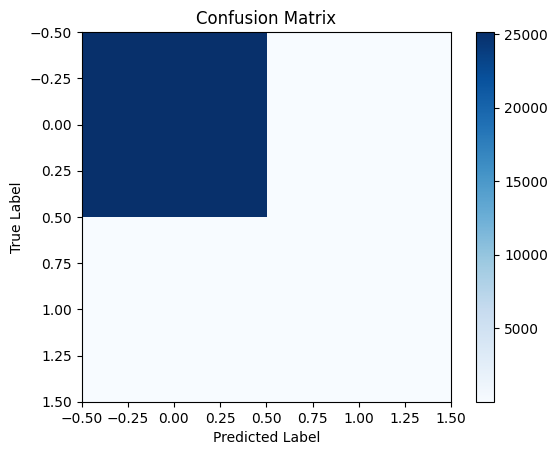

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Define the genetic algorithm functions

def initialize_population(population_size, chromosome_length):
    population = np.random.randint(2, size=(population_size, chromosome_length))
    return population

def decode_chromosome(chromosome):
    return np.where(chromosome == 1)[0]

def fitness_function(chromosomes, X_train, y_train, X_test, y_test):
    accuracies = []
    for chromosome in chromosomes:
        selected_features = X_train[:, chromosome]
        clf = DecisionTreeClassifier()
        clf.fit(selected_features, y_train)
        selected_test_features = X_test[:, chromosome]
        y_pred = clf.predict(selected_test_features)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    return np.array(accuracies)

def selection(chromosomes, fitness_values, num_parents):
    parents = np.empty((num_parents, chromosomes.shape[1]))
    for i in range(num_parents):
        max_fitness_idx = np.argmax(fitness_values)
        parents[i, :] = chromosomes[max_fitness_idx, :]
        fitness_values[max_fitness_idx] = -1
    return parents

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    crossover_point = np.uint8(offspring_size[1] / 2)
    for k in range(offspring_size[0]):
        parent1_idx = k % parents.shape[0]
        parent2_idx = (k+1) % parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    for idx in range(offspring_crossover.shape[0]):
        random_value = np.random.uniform(-1.0, 1.0, 1)
        random_index = np.random.randint(0, offspring_crossover.shape[1], 1)
        offspring_crossover[idx, random_index] = offspring_crossover[idx, random_index] + random_value
        offspring_crossover[idx, random_index] = np.clip(offspring_crossover[idx, random_index], 0, 1)
    return offspring_crossover

# Genetic Algorithm parameters
population_size = int(input("Enter Population :"))
num_generations = int(input("Enter Generations :"))
num_parents = 10
chromosome_length = X_train.shape[1]
num_features = chromosome_length

# Initialize the population
population = initialize_population(population_size, chromosome_length)

# Initialize lists to store best fitness values and corresponding generation number
best_fitness_values = []
best_generations = []

# Run the genetic algorithm
for generation in range(num_generations):
    # Calculate fitness of the population
    fitness_values = fitness_function(population, X_train, y_train, X_test, y_test)

    # Select the parents
    parents = selection(population, fitness_values, num_parents)

    # Generate offspring using crossover
    offspring_crossover = crossover(parents, offspring_size=(population_size - parents.shape[0], chromosome_length))

    # Perform mutation
    offspring_mutation = mutation(offspring_crossover)

    # Create the new population
    population[0:parents.shape[0], :] = parents
    population[parents.shape[0]:, :] = offspring_mutation

    # Calculate fitness of the new population
    fitness_values = fitness_function(population, X_train, y_train, X_test, y_test)
        # Store the best fitness value and corresponding generation number
    best_fitness = np.max(fitness_values)
    best_fitness_values.append(best_fitness)
    best_generations.append(generation)

    print("Generation:", generation, "Best Fitness:", best_fitness)

# Find the best solution
best_solution_idx = np.argmax(fitness_values)
best_solution = population[best_solution_idx]

# Select features based on the best solution
selected_features = X_train[:, decode_chromosome(best_solution)]

# Train the classifier using the selected features
clf = DecisionTreeClassifier()
clf.fit(selected_features, y_train)

# Test the classifier on the testing set
selected_test_features = X_test[:, decode_chromosome(best_solution)]
y_pred = clf.predict(selected_test_features)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)

# Plot accuracy and generation number
"""plt.plot(best_generations, best_fitness_values)
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.title('Genetic Algorithm - Accuracy vs. Generation')
plt.show()"""

# Plot confusion matrix
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<ipython-input-23-882d5e8f6689>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues')


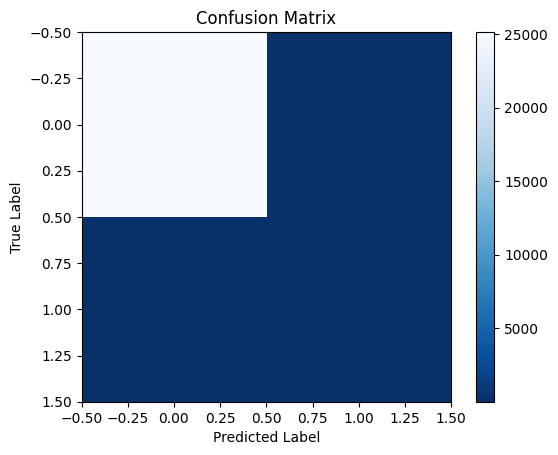

In [ ]:
# Define a custom colormap with reversed color values
cmap = plt.cm.get_cmap('Blues')
#reversed_cmap = cmap.reversed()

# Plot confusion matrix with the reversed colormap
plt.imshow(confusion_mat, interpolation='nearest', cmap=reversed_cmap)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

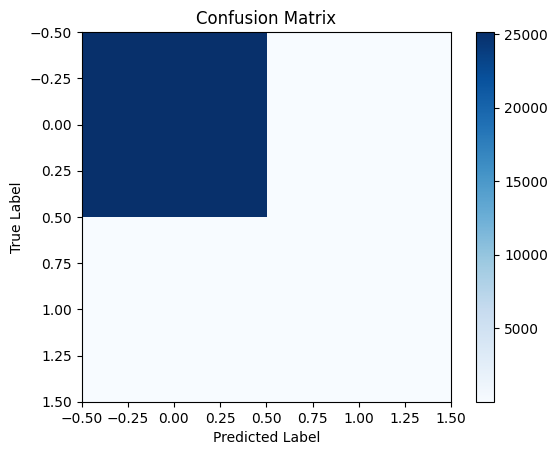

In [ ]:
from sklearn import metrics

# Calculate confusion matrix
confusion_mat = metrics.confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
